In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector
import pandas as pd
import numpy as np

In [2]:
# import data
df = pd.read_csv('../data/cleaned_insta.csv')

In [ ]:
#import zoomed data
dfzoom = pd.read_csv('../data/zoom_insta.csv')

In [3]:
df['Media Type:'].dtype

dtype('int64')

In [4]:
df['Tags'].nunique()

15

In [5]:
df['Follower count:'].unique()

array([  7074908,  27804324,   5016610,  16713423,  10845112,   1134541,
       303228329,   8380604,   4378658,  13024891])

In [6]:
# Separate features and target variable
X = df[['Follower count:', 'Media Type:','Tags','clean_captions']]
y = df['Likes']

In [7]:
# Define a ColumnTransformer 
# StandardScaler for Followers and Tags 
# CountVectorizer for captions
column_trans = ColumnTransformer(
    [('numeric', StandardScaler(), ['Follower count:','Tags']),
     ('caption', CountVectorizer(), 'clean_captions')],
    remainder='passthrough', verbose_feature_names_out=True)


# Fit and transform the data
X_transformed = column_trans.fit_transform(X)

# Get the feature names (optional)
feature_names = column_trans.get_feature_names_out()

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
df_transformed = pd.DataFrame(X_transformed)

In [10]:
df_transformed

,0
0,"(0, 0)\t-0.3709340466391671\n (0, 1)\t1.210..."
1,"(0, 0)\t-0.3709340466391671\n (0, 1)\t-0.37..."
2,"(0, 0)\t-0.3709340466391671\n (0, 1)\t0.019..."
3,"(0, 0)\t-0.3709340466391671\n (0, 1)\t0.019..."
4,"(0, 0)\t-0.3709340466391671\n (0, 1)\t1.607..."
...,...
995,"(0, 0)\t-0.30340962852812997\n (0, 1)\t0.81..."
996,"(0, 0)\t-0.30340962852812997\n (0, 1)\t0.81..."
997,"(0, 0)\t-0.30340962852812997\n (0, 1)\t-0.3..."
998,"(0, 0)\t-0.30340962852812997\n (0, 1)\t0.01..."


In [11]:
df_transformed.to_csv('df_trans.csv', index=False)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [13]:
# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
gb_regressor.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [14]:
# Make predictions on the testing data
y_pred = gb_regressor.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 211463738.72031584
Root Mean Squared Error: 14541.792830332712
R-squared: 0.9959036300891528


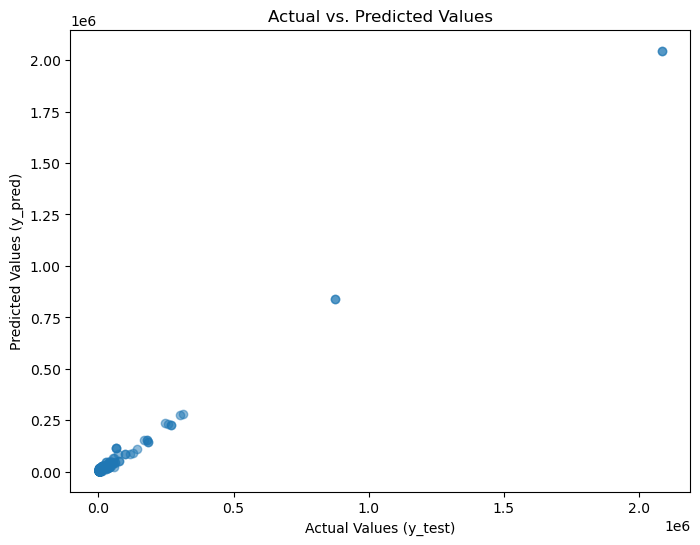

In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.show()


In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
regressor = GradientBoostingRegressor()

# randomized hyperparameters
param_grid = {
    'n_estimators': np.random.randint(50, 100, size=10),
    'learning_rate': np.random.uniform(0.01, 0.1, size=10),
    'max_features': np.random.uniform(0.1, 1.0, size=10),
    'subsample': np.random.uniform(0.5, 1.0, size=10)
}

# grid search
grid = RandomizedSearchCV(regressor, param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = grid.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")



Mean Squared Error: 516835096.1021252
Root Mean Squared Error: 22734.007480031436
R-squared: 0.989988128700672


In [ ]:
#RMSE is worse R-squared is slightly better...

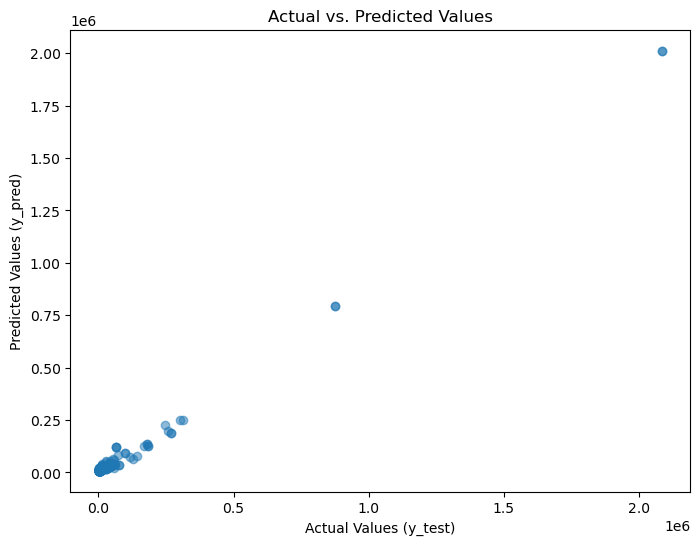

In [23]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.show()

In [ ]:
# Create the final pipeline with preprocessing and the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
])
# Train the model
model.fit(X_train, y_train)

In [ ]:
model.score(X_test,y_test)